In [85]:
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


In [79]:
num= np.array([1., 0., 3., 0])
den1= np.array([8., 0., 2.,1])
den2= np.array([8., 5., 2.,1])
w1= tf(num, den1)
w2= tf(num, den2)
print("Полюса_1: \n %s"%pole(w1))
print("Нулі_1:\n %s -\n "%zero(w1))
w1 

Полюса_1: 
 [ 0.17058195+0.5807707j  0.17058195-0.5807707j -0.3411639 +0.j       ]
Нулі_1:
 [-0.+1.73205081j  0.-1.73205081j  0.+0.j        ] -
 



   s^3 + 3 s
---------------
8 s^3 + 2 s + 1

### //Отримали нестійку систему

In [97]:
def stability(num, den1, k):
    return (k*num, den1 + k*num)

num_new1, den_new1 = stability(num, den1, 0.3)
w_new = tf(num_new, den_new)
print("Полюса: \n %s"%pole(w_new))
print("Нулі\n %s -\n "%zero(w_new))
w_new

Полюса: 
 [ 0.14059648+0.63929626j  0.14059648-0.63929626j -0.28119297+0.j        ]
Нулі
 [-0.+1.73205081j  0.-1.73205081j  0.+0.j        ] -
 



  0.3 s^3 + 0.9 s
-------------------
8.3 s^3 + 2.9 s + 1

### //Після всіх спроб підібрати коеф. я так і не отримала стійку систему, тому змінила den1 => den2 і далі працюємо з ним

In [81]:
print("Полюса_2: \n %s"%pole(w2))
print("Нулі_2:\n %s -\n "%zero(w2))
w2 

Полюса_2: 
 [-0.5707203 +0.j        -0.02713985+0.4672097j -0.02713985-0.4672097j]
Нулі_2:
 [-0.+1.73205081j  0.-1.73205081j  0.+0.j        ] -
 



       s^3 + 3 s
-----------------------
8 s^3 + 5 s^2 + 2 s + 1

## stable step and impulse

Text(0.5, 1.0, 'step')

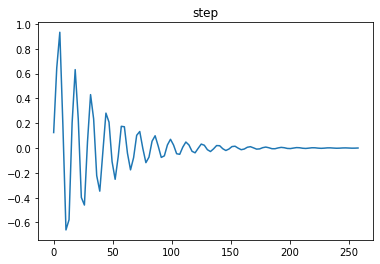

In [89]:
x, y = sig.step((num, den2))
plt.plot(x,y)
plt.title('step')


Text(0.5, 1.0, 'impulse')

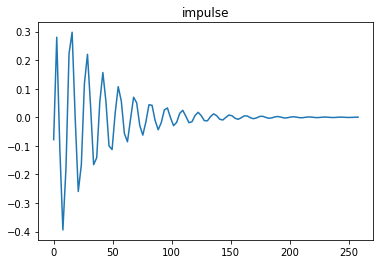

In [90]:
x, y = sig.impulse((num, den2))
plt.plot(x,y)
plt.title('impulse')

## zpk

In [92]:
z,p,k = sig.tf2zpk(num, den2)
z,p,k

(array([-0.+1.73205081j,  0.-1.73205081j,  0.+0.j        ]),
 array([-0.5707203 +0.j       , -0.02713985+0.4672097j,
        -0.02713985-0.4672097j]),
 0.125)

## zpk2ss

In [105]:
A,B,C,D = sig.zpk2ss(z,p,k)
A,B,C,D 

(array([[-0.625, -0.25 , -0.125],
        [ 1.   ,  0.   ,  0.   ],
        [ 0.   ,  1.   ,  0.   ]]), array([[1.],
        [0.],
        [0.]]), array([[-0.078125,  0.34375 , -0.015625]]), array([[0.125]]))

## observable

In [106]:
def A_Observe(denom):
    return np.array([[-denom[-3], 1, 0],[-denom[-2], 0, 1],[-denom[-1], 0,0]])

def B_Observe(num): return np.array([[num[-3]],[num[-2]],[num[-1]]])
def C_Observe(): return np.array([1,0,0])

print(A_Observe(den2))
print(B_Observe(num))
print(C_Observe())

[[-5.  1.  0.]
 [-2.  0.  1.]
 [-1.  0.  0.]]
[[0.]
 [3.]
 [0.]]
[1 0 0]


## controlable

In [107]:
def A_Control(denom):
    return np.array([[0, 1, 0],[0, 0, 1],[-denom[-1],-denom[-2],-denom[-3]]])

def B_Control(): return np.array([[0],[0],[1]])
def C_Control(num): return np.array([num[-1],num[-2],num[-3]])

print(A_Control(den2))
print(B_Control())
print(C_Control(num))

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [-1. -2. -5.]]
[[0]
 [0]
 [1]]
[0. 3. 0.]


## ss2tf

In [98]:
num_new2, den_new2 = sig.ss2tf(A,B,C,D)

Text(0.5, 1.0, 'step')

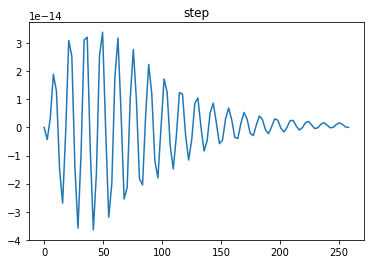

In [103]:
x, y1 = sig.step((num, den2))
x, y2 = sig.step((num_new2, den_new2))
plt.plot(x,y1-y2)
plt.title('step')

Text(0.5, 1.0, 'impulse')

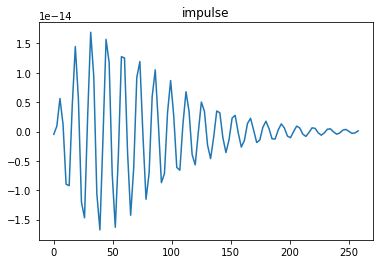

In [104]:
x, y1 = sig.impulse((num, den2))
x, y2 = sig.impulse((num_new2, den_new2))
plt.plot(x,y1-y2)
plt.title('impulse')